## Lecture 8: Feature Interactions

📊 **Understanding and Creating Feature Interactions for Enhanced Models**  

### **Key Learning Objectives**
1. Understand different types of feature interactions  
2. Create meaningful financial interaction features  
3. Combine categorical and numerical features  
4. Evaluate interaction effectiveness  

---

### **Common Types of Feature Interactions**  

#### **1. Polynomial Interaction (Multiplicative Relationship)**
Captures non-linear relationships by multiplying features.
$$
X_{\text{new}} = X_1 \times X_2
$$

#### **2. Ratio Interaction**
Expresses the relationship between two numerical features.
$$
X_{\text{new}} = \frac{X_1}{X_2 + \epsilon}
$$
(Adding \( \epsilon \) prevents division by zero.)

#### **3. Categorical-Numerical Interaction**
Combining categorical and numerical features by grouping numerical statistics (mean, sum, etc.) by categories.
$$
X_{\text{new}} = \frac{\sum X_{\text{num}}}{\text{Count}(X_{\text{cat}})}
$$

#### **4. Boolean Interaction (Binary Combination)**
Creates interaction features based on logical conditions.
$$
X_{\text{new}} =
\begin{cases}
1, & \text{if } X_1 > \theta_1 \text{ and } X_2 > \theta_2 \\
0, & \text{otherwise}
\end{cases}
$$

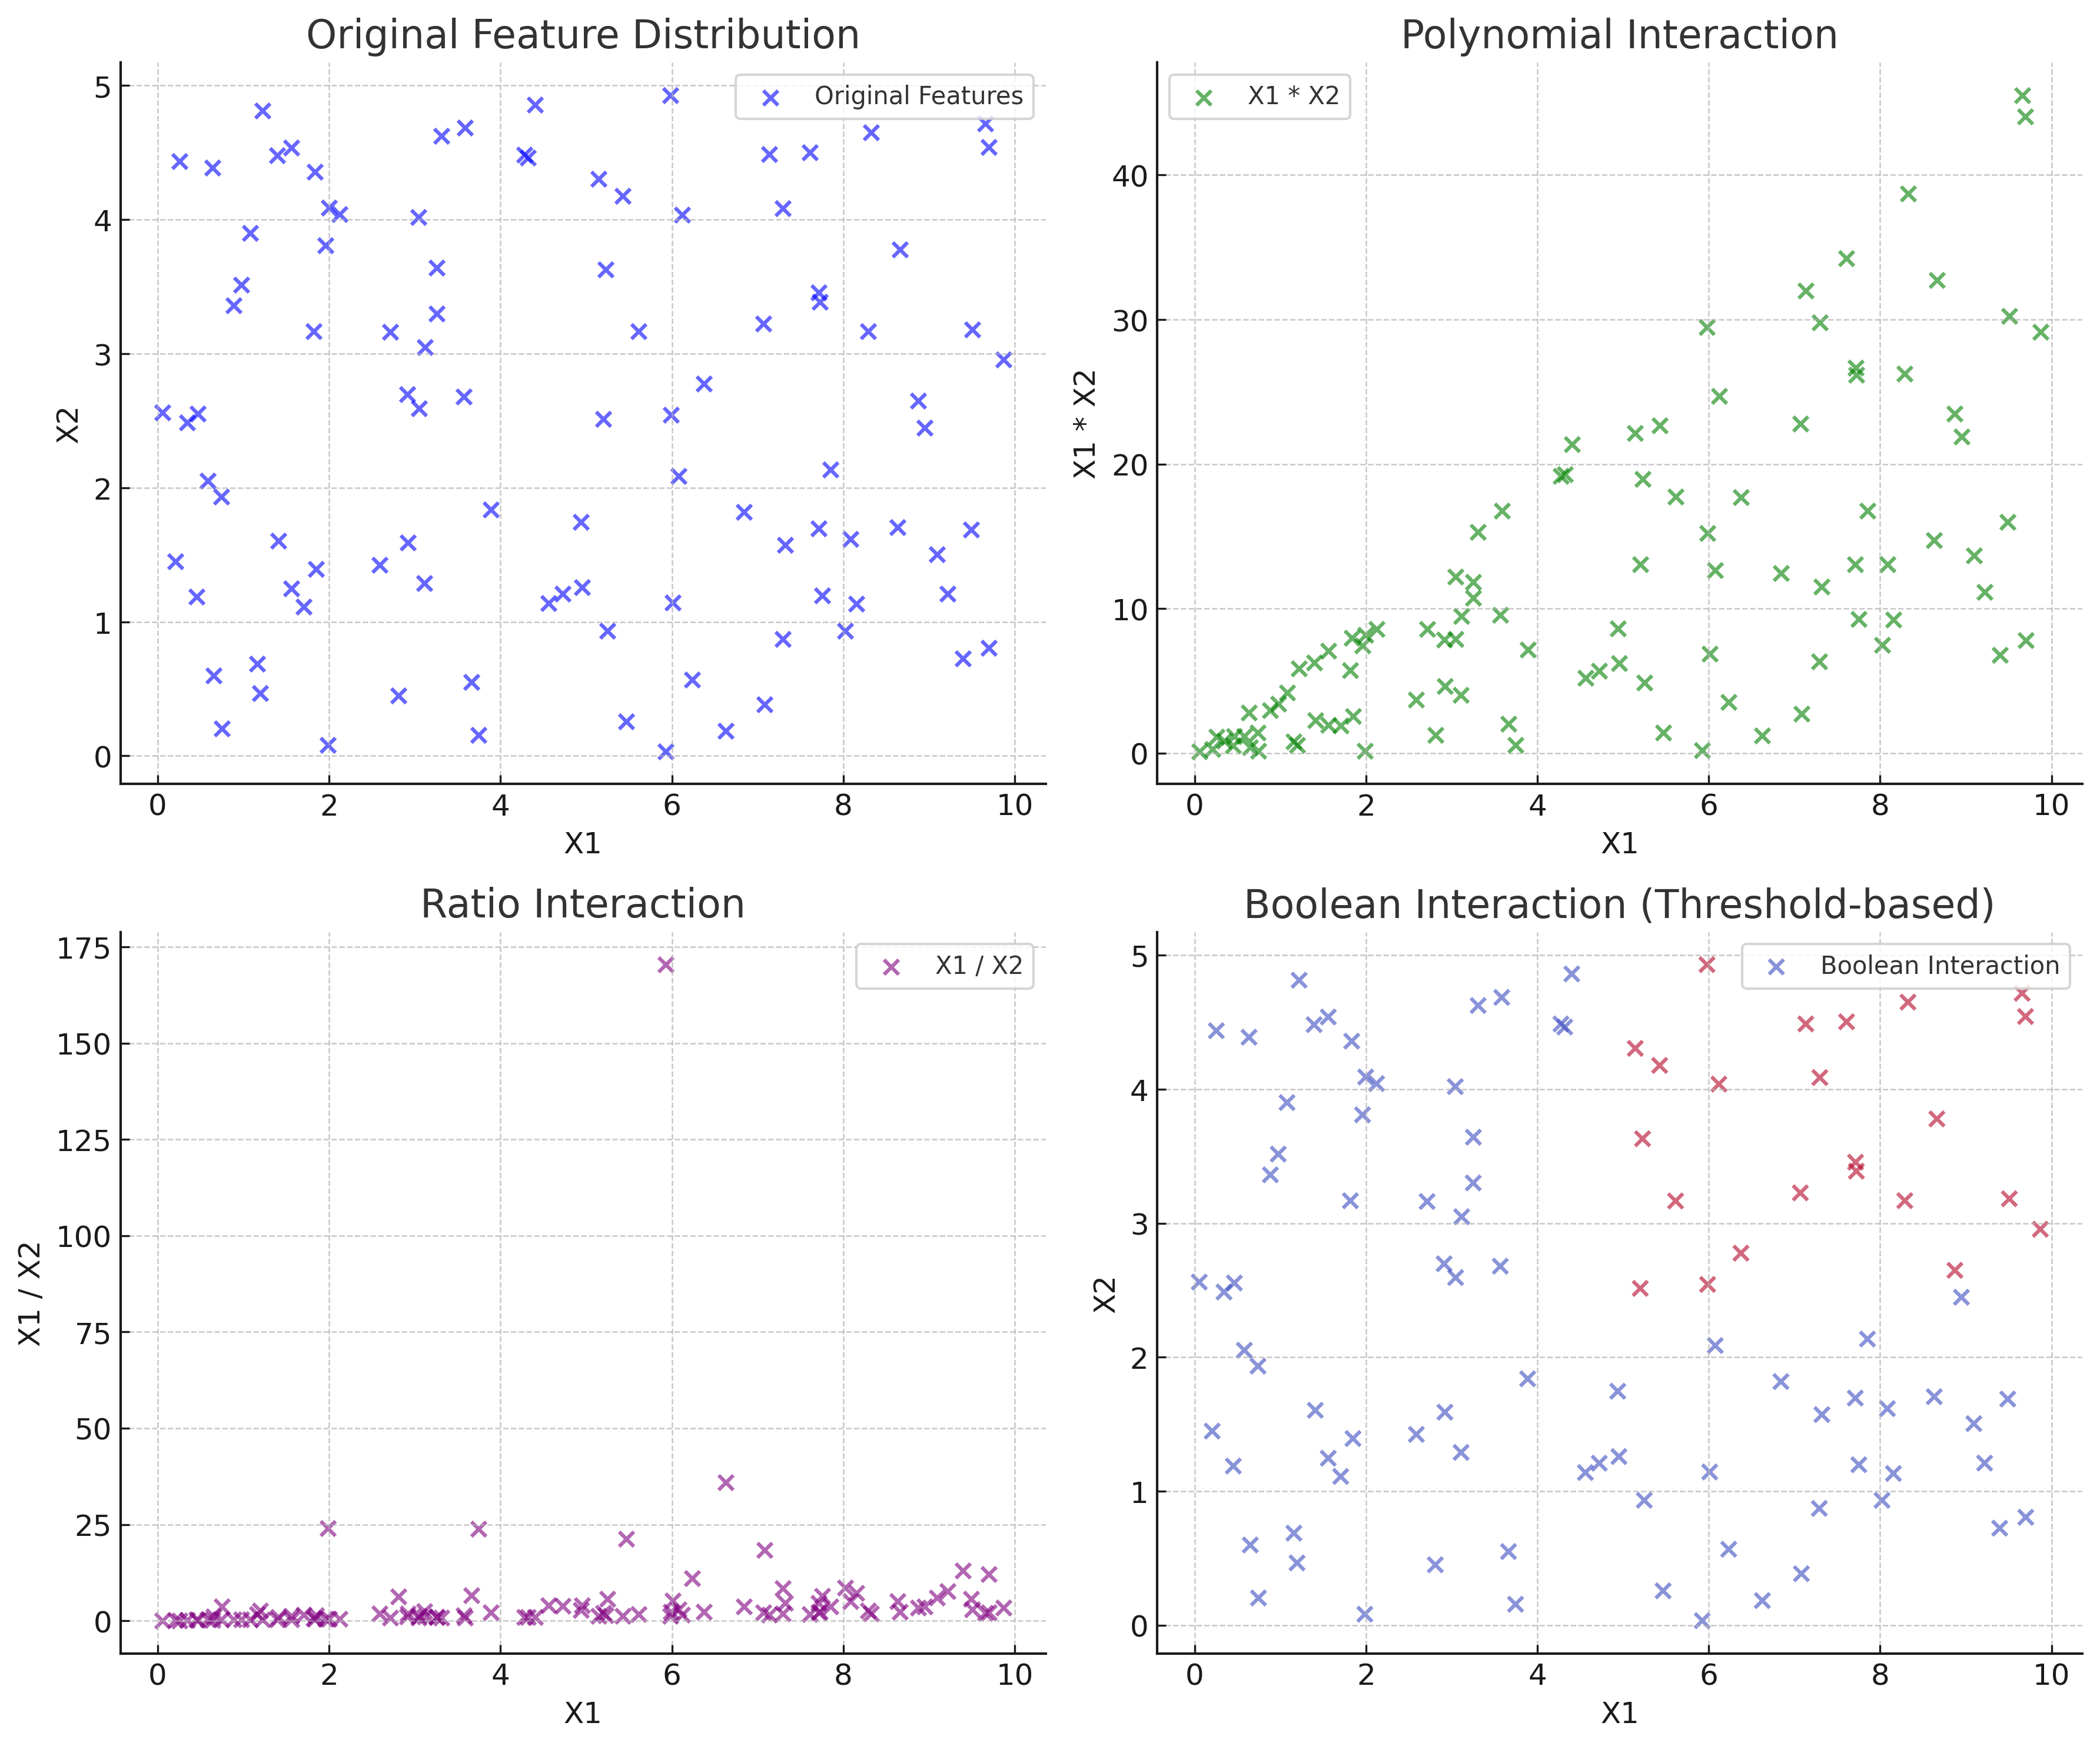

# 📌 Import necessary libraries

In [13]:
# 📌 Import necessary libraries
import pandas as pd  # Data manipulation 🐼
import numpy as np  # Numerical operations 🔢
import matplotlib.pyplot as plt  # Visualization 📊
import seaborn as sns  # Advanced visualization 🌊
import warnings
# Ignore FutureWarnings (e.g., deprecation warnings from Seaborn)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import PolynomialFeatures  # Feature interactions ➕
from scipy.stats import chi2_contingency  # Statistical tests 🧮

# 📥 Load the dataset
df = pd.read_csv('loan_applications.csv')
print("✅ Dataset successfully loaded! Shape:", df.shape)  # 🏷️ Print dataset shape

✅ Dataset successfully loaded! Shape: (50000, 17)


In [14]:
# 🎯 Select numerical features for interaction analysis
numerical_features = ['income', 'loan_amount', 'monthly_payment',
                      'credit_score', 'employment_length']
df_interactions = df.copy()
print("📊 Selected numerical features:", numerical_features)


📊 Selected numerical features: ['income', 'loan_amount', 'monthly_payment', 'credit_score', 'employment_length']


# 🚀 1. Basic Financial Ratios (Feature Engineering)

In [15]:
# 🚀 1. Basic Financial Ratios (Feature Engineering)
# ✅ Debt service ratio (Ability to pay debt)
df_interactions['debt_service_ratio'] = df['monthly_payment'] / df['income']

# ✅ Loan to income ratio (How large is the loan compared to income)
df_interactions['loan_to_income'] = df['loan_amount'] / df['income']

# ✅ Payment to loan ratio (How much is being paid compared to loan amount)
df_interactions['payment_to_loan'] = df['monthly_payment'] / df['loan_amount']

print("✅ Financial ratios added! Columns:", df_interactions.columns[-3:])  # 🏦 Print added feature names


✅ Financial ratios added! Columns: Index(['debt_service_ratio', 'loan_to_income', 'payment_to_loan'], dtype='object')


# 🔄 2. Polynomial Feature Interactions (Capturing non-linear relationships)

In [16]:
# 🔄 2. Polynomial Feature Interactions (Capturing non-linear relationships)
poly = PolynomialFeatures(degree=2, include_bias=False)  # 🔢 Create polynomial transformer
poly_features = ['loan_amount']  # Select feature for interaction
poly_transformed = poly.fit_transform(df[poly_features])  # Apply transformation
poly_names = poly.get_feature_names_out(poly_features)  # Get feature names

# 📢 Print the generated polynomial feature names
print("🔢 Generated Polynomial Features:", poly_names)

🔢 Generated Polynomial Features: ['loan_amount' 'loan_amount^2']


In [17]:
# 🔁 Add polynomial features to dataframe
for i, name in enumerate(poly_names):
    if i >= len(poly_features):  # 🚨 Avoid duplicating original feature
        df_interactions[name] = poly_transformed[:, i]

print("✅ Polynomial interactions added! New columns:", df_interactions.columns[-len(poly_names) + 1:])


✅ Polynomial interactions added! New columns: Index(['loan_amount^2'], dtype='object')


# ⚖️ 3. Risk-Weighted Features (Adjusting based on credit score)

In [18]:
# ⚖️ 3. Risk-Weighted Features (Adjusting based on credit score)
df_interactions['risk_weighted_income'] = df['income'] * (df['credit_score'] / df['credit_score'].max())
df_interactions['risk_weighted_loan'] = df['loan_amount'] * (1 - df['credit_score'] / df['credit_score'].max())

print("✅ Risk-weighted features added! Columns:", df_interactions.columns[-2:])  # 💰 Show risk features


✅ Risk-weighted features added! Columns: Index(['risk_weighted_income', 'risk_weighted_loan'], dtype='object')


# 🎨 Visualizing the new features 📊

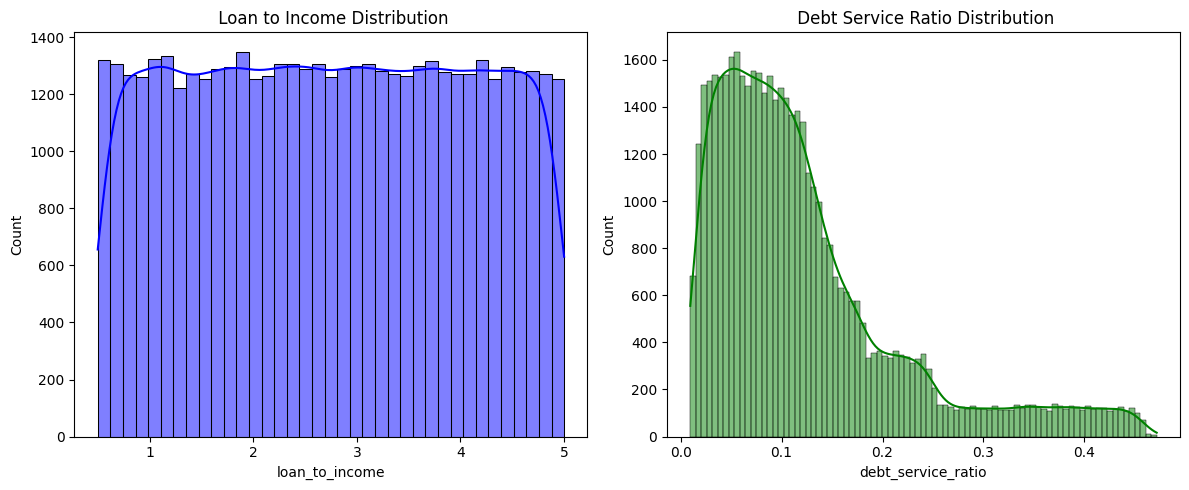

🎉 Feature engineering complete! Ready for modeling.


In [19]:
# 🎨 Visualizing the new features 📊
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_interactions['loan_to_income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title(" Loan to Income Distribution")

sns.histplot(df_interactions['debt_service_ratio'], kde=True, ax=axes[1], color='green')
axes[1].set_title(" Debt Service Ratio Distribution")

plt.tight_layout()
plt.show()

print("🎉 Feature engineering complete! Ready for modeling.")  # 🎯 Final print statement

# 📊 **Create interactions between categorical and numerical features.**  

### **Why Use Categorical-Numerical Interactions?**
- Helps capture category-level patterns in numerical features.  
- Improves feature engineering for better predictive power.  
- Reduces information loss from categorical encoding.

---

### **Common Techniques for Categorical-Numerical Interactions**  

#### **1. Group Mean Encoding (Target Encoding)**
Computes the mean of a numerical feature for each category.
$$
X' = \frac{\sum X_{\text{num}}}{\text{Count}(X_{\text{cat}})}
$$

#### **2. Group Median Encoding**
Uses the median instead of the mean for robustness.
$$
X' = \text{Median}(X_{\text{num}} \mid X_{\text{cat}})
$$

#### **3. Count Encoding**
Counts the occurrences of each category in the dataset.
$$
X' = \text{Count}(X_{\text{cat}})
$$

#### **4. Interaction Term (Multiplicative Encoding)**
Multiplies the numerical value by a binary categorical feature.
$$
X' = X_{\text{num}} \times X_{\text{cat\_binary}}
$$

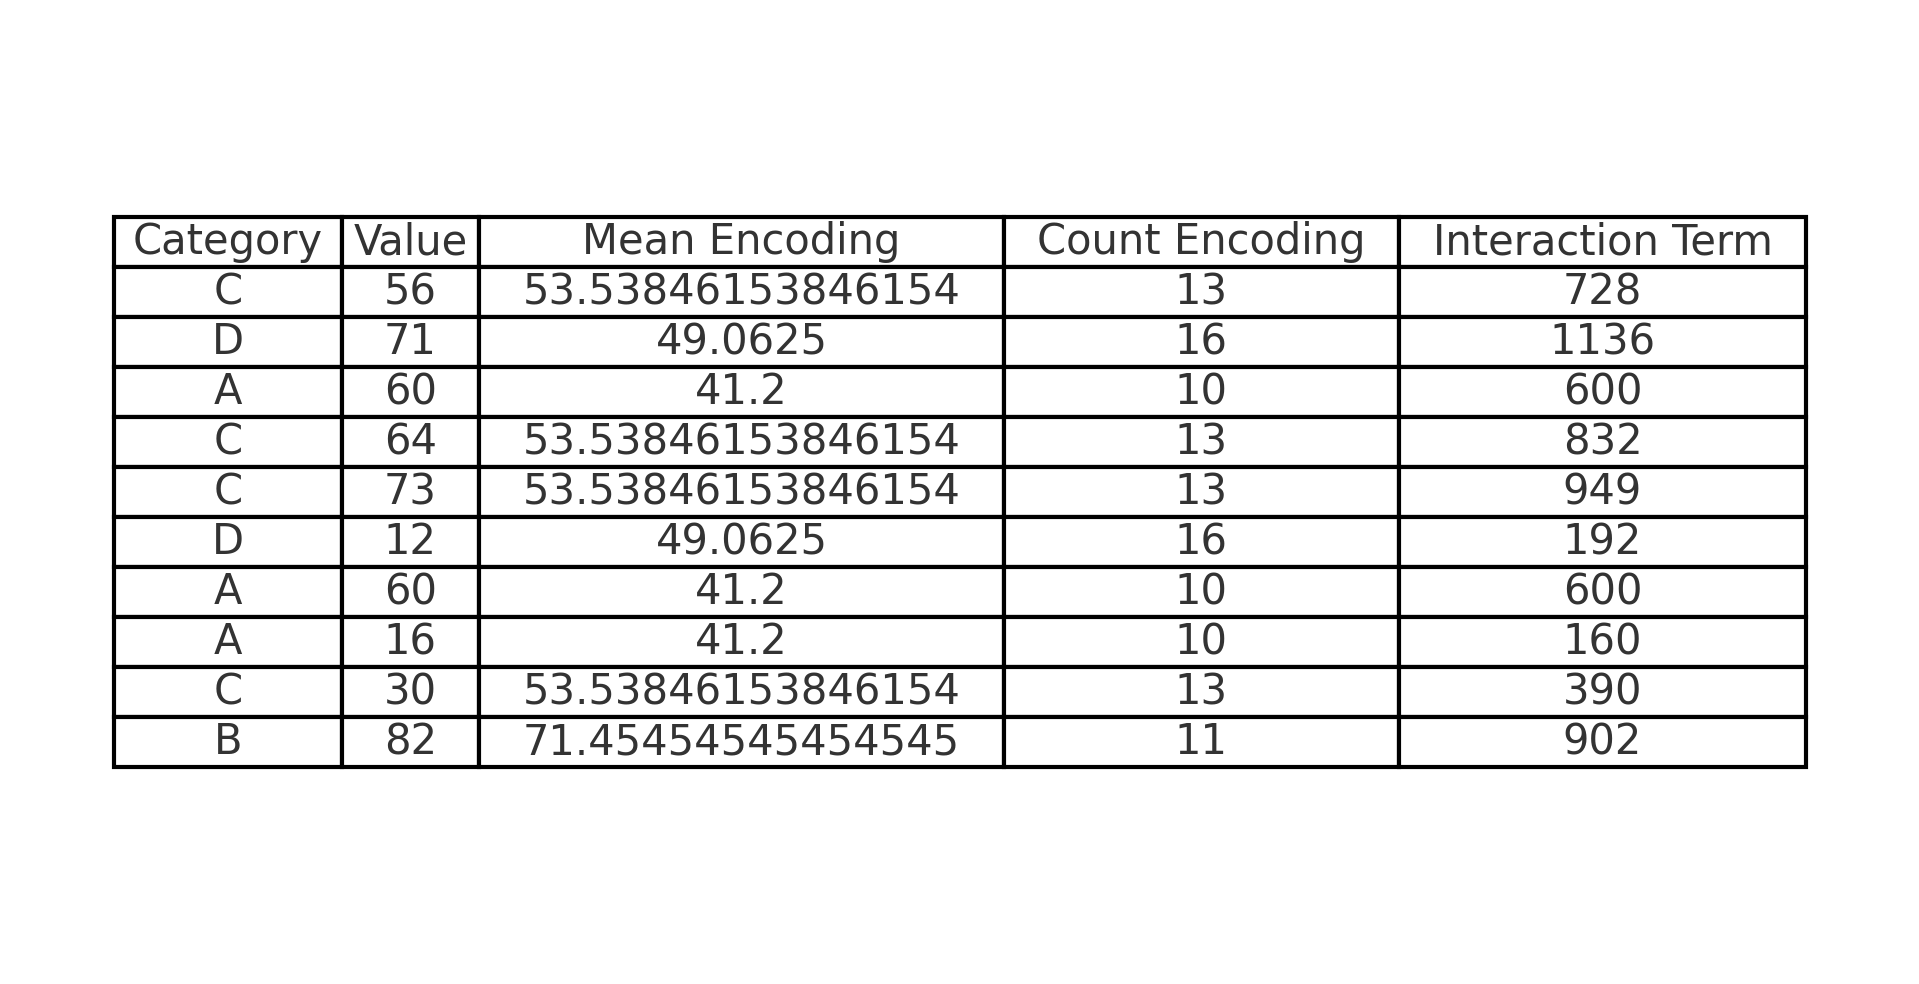

# 📌 Step 1: Education-Income Interaction

In [20]:
# 📌 Step 1: Education-Income Interaction
# 🎓 We calculate the mean income for each education level and create a relative income feature.

# ✅ Compute mean income by education level
education_income_mean = df.groupby('education')['income'].transform('mean')

# ✅ Create a new feature: Relative Income (individual income compared to education-level mean)
df_interactions['relative_income'] = df['income'] / education_income_mean

# 📢 Print confirmation and a preview of the new feature
print("✅ 'relative_income' feature created! 🎓📊")
print(df_interactions[['education', 'income', 'relative_income']].head())



✅ 'relative_income' feature created! 🎓📊
     education    income  relative_income
0       Master  40298.38         0.746291
1     Bachelor  38167.11         0.921960
2     Bachelor   8666.27         0.209341
3  High School  33093.00         0.995906
4       Master  41115.42         0.761422


In [21]:
# 📌 Step 2: Occupation-Loan Interaction
# 💼 We analyze the average loan amount per occupation and compare individual loans.

# ✅ Compute mean loan amount for each occupation
occupation_loan_mean = df.groupby('occupation')['loan_amount'].transform('mean')

# ✅ Create a new feature: Relative Loan (individual loan compared to occupation-level mean)
df_interactions['relative_loan'] = df['loan_amount'] / occupation_loan_mean

# 📢 Print confirmation and a preview of the new feature
print("✅ 'relative_loan' feature created! 💼💰")
print(df_interactions[['occupation', 'loan_amount', 'relative_loan']].head())


✅ 'relative_loan' feature created! 💼💰
      occupation  loan_amount  relative_loan
0  Self-employed     95254.57       0.713280
1       Salaried    140514.31       1.256226
2     Unemployed     13340.61       0.610890
3       Salaried     73008.42       0.652710
4       Salaried     51399.26       0.459520


# 🎨 Visualizing the new features 📊

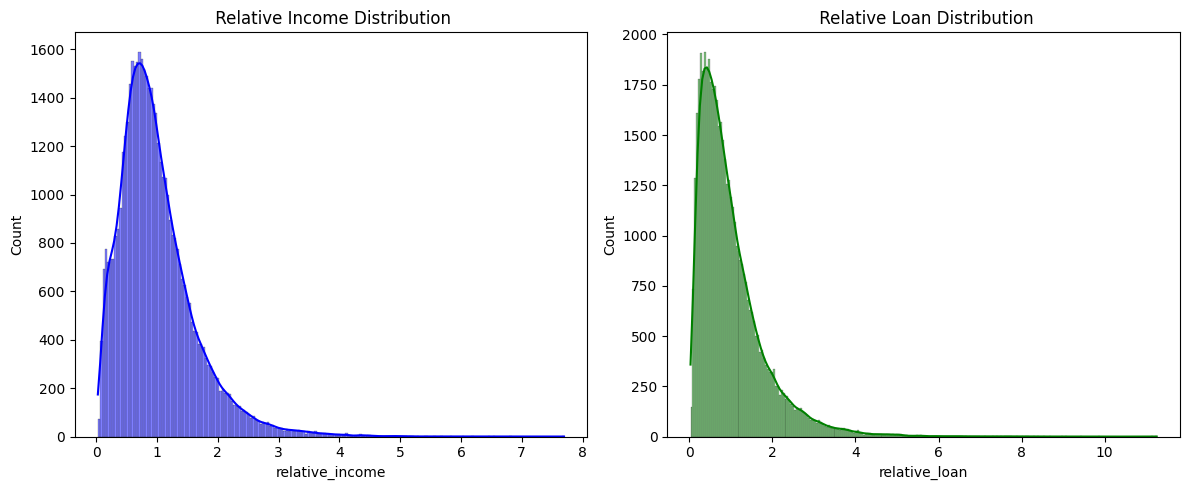

🎉 Feature engineering complete! 🚀 These new features provide useful financial insights.


In [23]:
# 🎨 Visualizing the new features 📊
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 🔵 Relative Income Distribution
sns.histplot(df_interactions['relative_income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title(" Relative Income Distribution")

# 🟢 Relative Loan Distribution
sns.histplot(df_interactions['relative_loan'], kde=True, ax=axes[1], color='green')
axes[1].set_title(" Relative Loan Distribution")

plt.tight_layout()
plt.show()

print("🎉 Feature engineering complete! 🚀 These new features provide useful financial insights.")